In [1]:
# !pip install scikeras

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [3]:
df_kdd = pd.read_pickle("./data/KDDCUP/KDDCUP_DF_Preprocessed.pkl")

In [4]:
y = df_kdd[['Attack Type']]
X = df_kdd.drop(columns=['Attack Type'], axis=1)

In [6]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [8]:
print("X_train shape: {} X_test shape {} ".format(X_train.shape, X_test.shape))
print("y_train shape: {} y_test shape {} ".format(y_train.shape, y_test.shape))

X_train shape: (395216, 39) X_test shape (98805, 39) 
y_train shape: (395216, 1) y_test shape (98805, 1) 


In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import time

In [10]:
gnb = GaussianNB()
start_time = time.time()
gnb.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time)

Training time:  0.3068559169769287


In [11]:
print("Train score: ", gnb.score(X_train, y_train))
print("Test score: ", gnb.score(X_test, y_test))

Train score:  0.9854838872920124
Test score:  0.9854359597186377


In [12]:
rfc = RandomForestClassifier(n_estimators=20)
start_time = time.time()
rfc.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time)

Training time:  5.629163980484009


In [13]:
print("Train score: ", rfc.score(X_train, y_train))
print("Test score: ", rfc.score(X_test, y_test))

Train score:  0.9999772276426055
Test score:  0.9997672182581853


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
from sklearn.metrics import accuracy_score

2024-04-22 18:47:11.697814: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model = Sequential([
    Input(shape=(39,)),  # Explicit input layer specifying the input shape
    Dense(64, activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)  # Use 20% of the training data for validation purposes

Epoch 1/10
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9863 - loss: 0.0449 - val_accuracy: 0.9984 - val_loss: 0.0059
Epoch 2/10
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9988 - loss: 0.0049 - val_accuracy: 0.9989 - val_loss: 0.0038
Epoch 3/10
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9990 - loss: 0.0037 - val_accuracy: 0.9991 - val_loss: 0.0034
Epoch 4/10
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 5/10
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9993 - val_loss: 0.0029
Epoch 6/10
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9993 - loss: 0.0024 - val_accuracy: 0.9993 - val_loss: 0.0026
Epoch 7/10
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9993 - loss: 0.0025 - val_accuracy: 0.9993 - val_loss: 0.0025
Epoch 8/10
4941/4941 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9994 - loss: 0.0022 - 

In [18]:
start_time = time.time()
y_predict = model.predict(X_test)
y_pred_binary = (y_predict > 0.5).astype(int)
end_time = time.time()
accuracy_score(y_test, y_pred_binary)

3088/3088 ━━━━━━━━━━━━━━━━━━━━ 2s 676us/step


0.9991700824857042

In [45]:
def create_sequences(data, seq_length):
    xs = []
    for i in range(len(data) - seq_length + 1):
        x = data[i:(i + seq_length)]
        xs.append(x)
    return np.array(xs)

In [46]:
seq_length = 20  # Specify your sequence length here

X_train_seq = create_sequences(X_train, seq_length)
X_test_seq = create_sequences(X_test, seq_length)

X_train_seq = X_train_seq.reshape((-1, seq_length, X_train.shape[1]))
X_test_seq = X_test_seq.reshape((-1, seq_length, X_test.shape[1]))

y_train_seq = y_train[seq_length - 1:]
y_test_seq = y_test[seq_length - 1:]

In [47]:
model_lstm = Sequential([
    LSTM(50, input_shape=(seq_length, X_train.shape[1])),
    Dense(1, activation='sigmoid')
])

/Users/mannanrehbari/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
history = model_lstm.fit(X_train_seq, y_train_seq, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.9696 - loss: 0.0829 - val_accuracy: 0.9935 - val_loss: 0.0188
Epoch 2/20
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.9944 - loss: 0.0166 - val_accuracy: 0.9969 - val_loss: 0.0096
Epoch 3/20
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.9980 - loss: 0.0081 - val_accuracy: 0.9979 - val_loss: 0.0071
Epoch 4/20
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 0.9987 - val_loss: 0.0052
Epoch 5/20
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.9987 - loss: 0.0048 - val_accuracy: 0.9984 - val_loss: 0.0054
Epoch 6/20
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.9988 - loss: 0.0043 - val_accuracy: 0.9987 - val_loss: 0.0045
Epoch 7/20
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.9989 - loss: 0.0040 - val_accuracy: 0.9985 - val_loss: 0.0047
Epoch 8/20
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.9990 - loss: 0

In [50]:
test_loss, test_acc = model_lstm.evaluate(X_test_seq, y_test_seq)
print(f"Test Accuracy: {test_acc:.4f}%")

3088/3088 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9989 - loss: 0.0040
Test Accuracy: 0.9990%


In [51]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [52]:
def plot_lstm(history):
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plotting training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'gs-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'gs-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

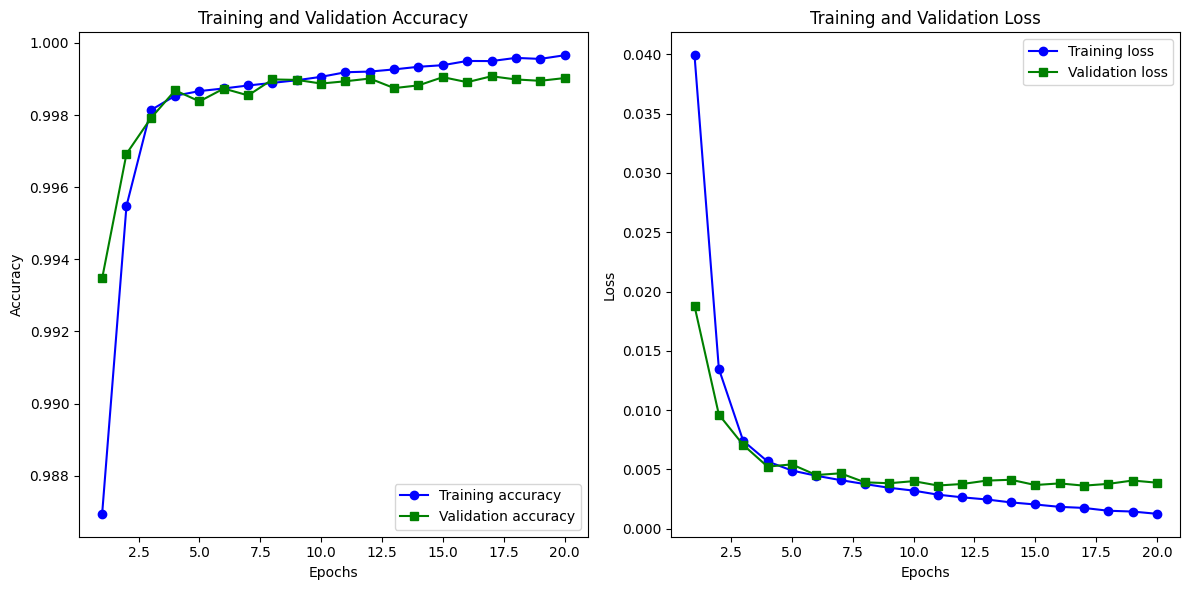

In [53]:
plot_lstm(history)

In [56]:
model_lstm.save("./data/KDDCUP/KDDCUP_LSTM.keras")